In [117]:
#!conda install -y -c conda-forge opencv
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### 1. Mostre cada uma das imagens de forma correta e nos espaços de cores RGB e gray.

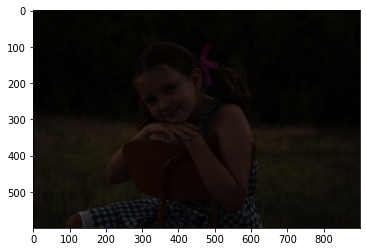

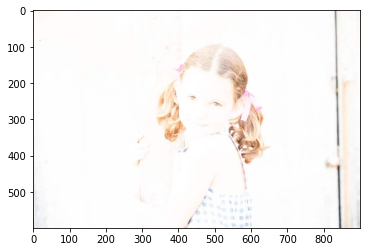

In [118]:
img1 = cv2.imread('Overexposure-vs-Underexposure-4-1-1.jpeg')
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('Overexposure-vs-Underexposure-4-1-3.jpeg')
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img1_rgb)
plt.show()
plt.imshow(img2_rgb)

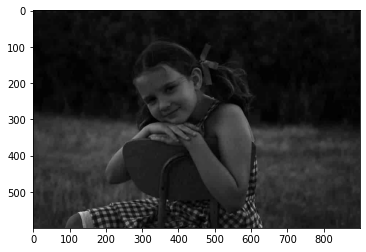

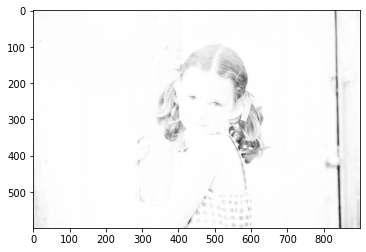

In [119]:
img1_gray = cv2.imread('Overexposure-vs-Underexposure-4-1-1.jpeg', 0)
img2_gray = cv2.imread('Overexposure-vs-Underexposure-4-1-3.jpeg', 0)

plt.imshow(img1_gray, cmap="gray")
plt.show()
plt.imshow(img2_gray, cmap="gray")

### 2. Com as imagens em gray, mostre qual o tipo de problema que cada uma das imagens passa, explicando o porquê isso acontece e apresente comprovações por meio de técnicas e visualizações aprendidas previamente.

Abaixo podemos ver o histogramas de cada uma das imagens. Os histogramas demonstram em cada uma das imagens há uma grande concentração de pixels em uma região específica. Na primeira imagem muitos pixels à esquerda do histograma indica que há muitos pixels em tons escuros (próximo do 0) o que torna a imagem inteira muito escura. Na segunda imagem acontece o oposto onde a maioria dos pixels estão em tons claros (próximo do 255) e a imagem inteira é muito clara.

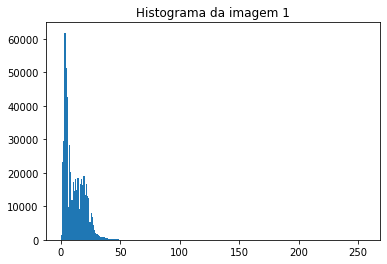

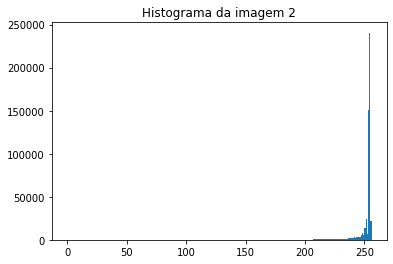

In [120]:
plt.hist(img1_gray.ravel(), 256, [0, 256])
plt.title("Histograma da imagem 1")
plt.show()

plt.hist(img2_gray.ravel(), 256, [0, 256])
plt.title("Histograma da imagem 2")
plt.show()

### 3.Proponha e implemente métodos de realce ou melhoria para que as fotos aparentem mais parecidas com o normal, assim retirando por completo ou parte do ruído tornando as imagens em gray mais nítidas.

Considerando uma imagem cujos valores de pixel estão limitados a uma faixa específica de valores apenas. Por exemplo, uma imagem mais brilhante terá todos os pixels restritos a valores altos. Mas uma boa imagem terá pixels de todas as regiões da imagem. Portanto, é preciso esticar este histograma para ambos os extremose é isso que a Equalização Histograma faz (em palavras simples). Isto normalmente melhora o contraste da imagem.

![image](https://docs.opencv.org/4.x/histogram_equalization.png)

Infelizmente o resultado é razoável para a imagem muito escura porém muito ruim para a imagem muito brilhante.

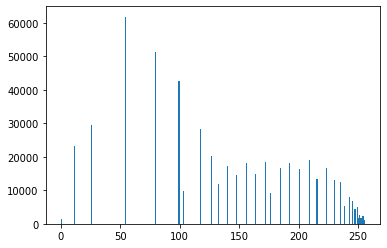

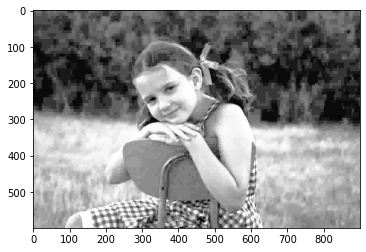

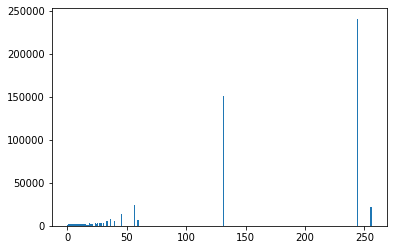

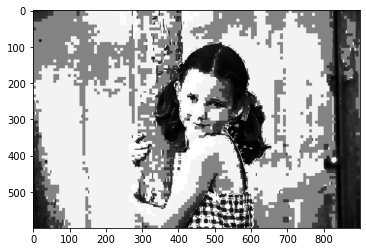

In [121]:
img1_gray_eq = cv2.equalizeHist(img1_gray)
img2_gray_eq = cv2.equalizeHist(img2_gray,)

plt.hist(img1_gray_eq.ravel(), 256, [0, 256])
plt.show()
plt.imshow(img1_gray_eq, cmap="gray")
plt.show()

plt.hist(img2_gray_eq.ravel(), 256, [0, 256])
plt.show()
plt.imshow(img2_gray_eq, cmap="gray")

Uma outra saída seria também apenas determinar um "threshold" e tentar deslocar todo o histograma para o valor do threshold. Também o resultado é apenas razoável e podemos explorar outras técnicas.

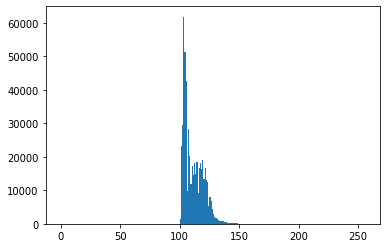

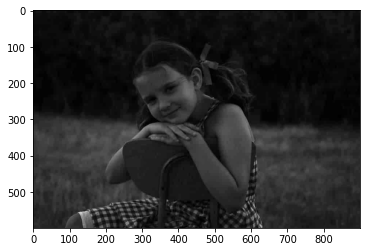

In [122]:
img1_gray_eq_2 = img1_gray
val_eq = 100

for y in range(0, img1_gray.shape[0]):
	for x in range(0, img1_gray.shape[1]):
		if img1_gray[y, x] + val_eq <= 255:
			img1_gray_eq_2[y, x] = img1_gray[y, x] + val_eq
		else:
			img1_gray_eq_2[y, x] = 255

plt.hist(img1_gray_eq_2.ravel(), 256, [0, 256])
plt.show()
plt.imshow(img1_gray_eq_2, cmap="gray")
plt.show()

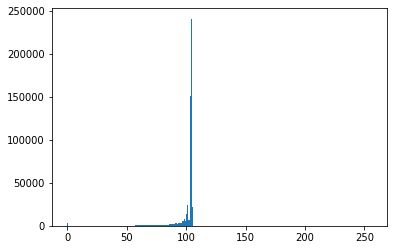

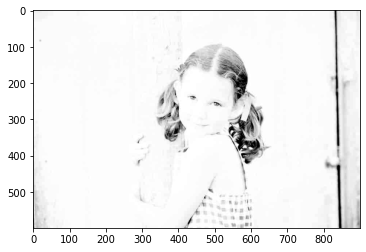

In [123]:
img2_gray_eq_2 = img2_gray
val_eq = 150

for y in range(0, img2_gray.shape[0]):
	for x in range(0, img2_gray.shape[1]):
		if img2_gray[y, x] - val_eq > 0:
			img2_gray_eq_2[y, x] = img2_gray[y, x] - val_eq
		else:
			img2_gray_eq_2[y, x] = 0

plt.hist(img2_gray_eq_2.ravel(), 256, [0, 256])
plt.show()
plt.imshow(img2_gray_eq_2, cmap="gray")
plt.show()

CLAHE (Contrast Limited Adaptive Histogram Equalization)

Outra técnica que podemos utilizar é a equalização adaptativa de histogramas. Nesta, a imagem é dividida em pequenos blocos chamados "tiles" (tileSize é 8x8 por padrão no OpenCV). Em seguida, cada um destes blocos é equalizado no histograma, como de costume. Assim, em uma pequena área, o histograma se limitaria a uma pequena região (a menos que houvesse ruído). Se houver ruído, ele será amplificado. Para evitar isto, é aplicada uma limitação de contraste. Se qualquer histograma estiver acima do limite de contraste especificado (por padrão 40 no OpenCV), esses pixels são recortados e distribuídos uniformemente para outras caixas antes de aplicar a equalização do histograma. Após a equalização, para remover artefatos nas bordas dos ladrilhos, é aplicada a interpolação bilinear.

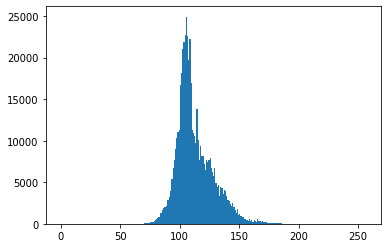

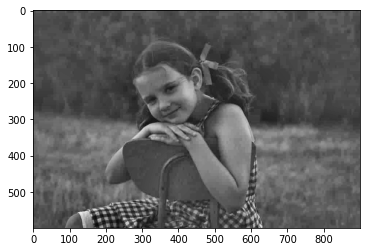

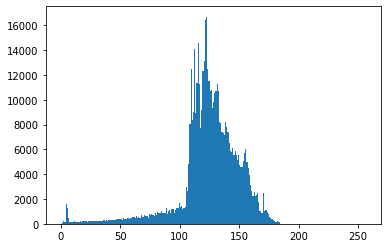

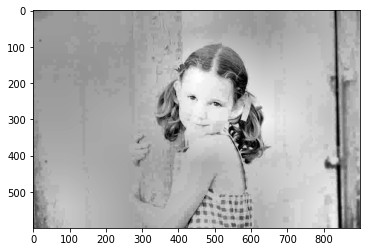

In [124]:

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img1_gray)
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(5,5))
cl2 = clahe.apply(img2_gray)

plt.hist(cl1.ravel(), 256, [0, 256])
plt.show()
plt.imshow(cl1, cmap="gray")
plt.show()

plt.hist(cl2.ravel(), 256, [0, 256])
plt.show()
plt.imshow(cl2, cmap="gray")
plt.show()

Correção gama

A correção gama também é conhecida como a Transformação da Lei de Potência. Primeiro, as intensidades dos pixels da imagem devem ser escalonadas da faixa [0, 255] para [0, 1,0]. A partir daí, obtemos nossa imagem corrigida por gama de saída, aplicando a seguinte equação:

O = I ^ (1 / G)

Onde eu sou a nossa imagem de entrada e G é o nosso valor gama. A imagem de saída O é então escalada de volta à faixa [0, 255].

Os valores gama < 1 deslocarão a imagem para o extremo mais escuro do espectro, enquanto os valores gama > 1 farão a imagem parecer mais clara. Um valor gama de G=1 não terá efeito sobre a imagem de entrada

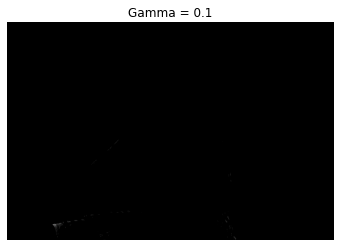

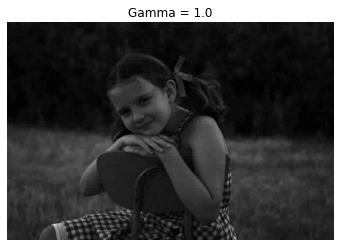

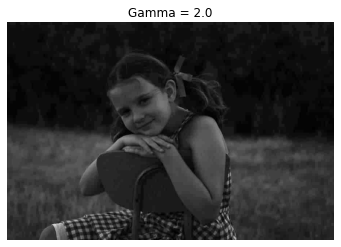

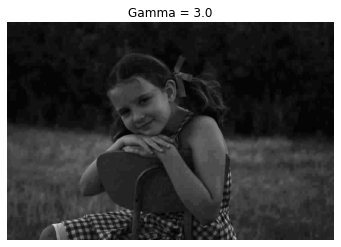

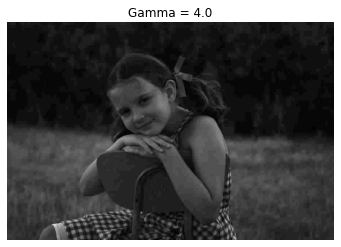

In [125]:
def adjust_gamma(image, gamma=1.0):
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	return cv2.LUT(image, table)

for gamma in np.arange(0.0, 5.0, 1.0):
	gamma = gamma if gamma > 0 else 0.1
	adjusted = adjust_gamma(img1_gray, gamma=gamma)
	plt.imshow(adjusted, cmap="gray")
	plt.title("Gamma = %.1f" % gamma)
	plt.axis("off")
	plt.show()

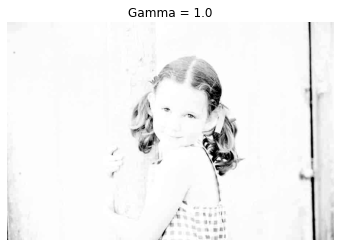

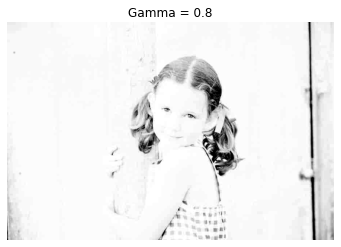

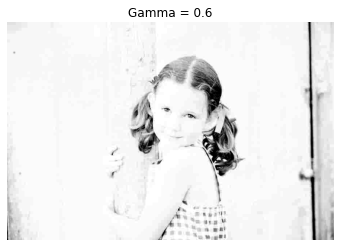

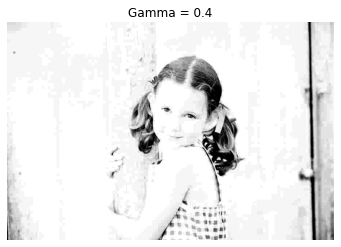

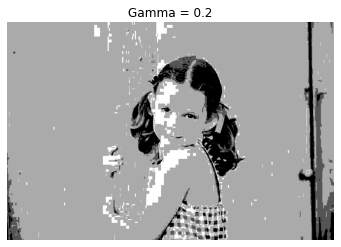

In [126]:
for gamma in np.arange(1.0, 0.1, -0.2):
	gamma = gamma if gamma > 0 else 0.1
	adjusted = adjust_gamma(img2_gray, gamma=gamma)
	plt.imshow(adjusted, cmap="gray")
	plt.title("Gamma = %.1f" % gamma)
	plt.axis("off")
	plt.show()

### 4. Desafio final! Todo esse processamento baseou-se em utilizar apenas a imagem em escala de cinza (gray), agora, o objetivo é alterá-la para que possa usá-la no banco de imagens, também, a colorida (RGB). Uma maneira é utilizar outro espaço de cor conhecido o Hue, Saturation e Value (HSV) e tentar no que apenas representa a luz. Agora é com você! Apresente o que conseguiu!


A partir das técnicas utilizadas acima, a correção gama é a mais eficiente e a utilizaremos para a correção das imagens em cores também.

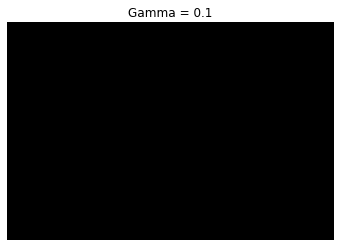

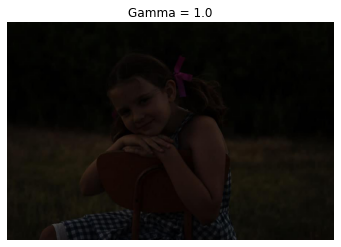

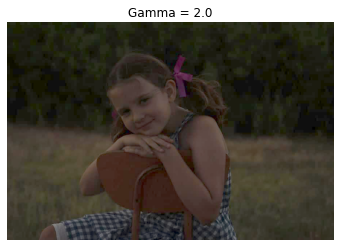

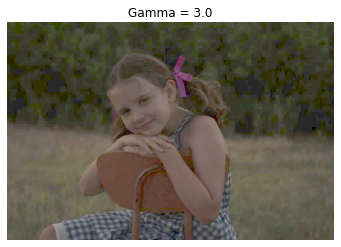

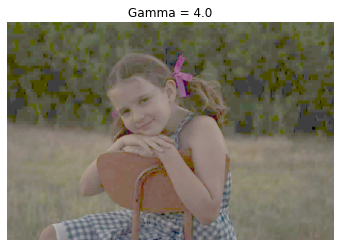

In [127]:
for gamma in np.arange(0.0, 5.0, 1.0):
	gamma = gamma if gamma > 0 else 0.1
	adjusted = adjust_gamma(img1_rgb, gamma=gamma)
	plt.imshow(adjusted)
	plt.title("Gamma = %.1f" % gamma)
	plt.axis("off")
	plt.show()

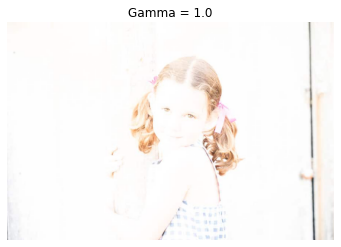

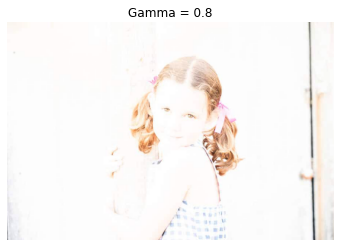

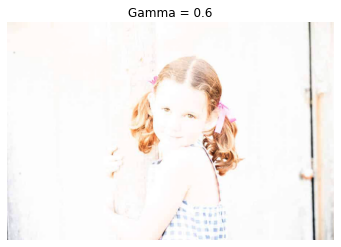

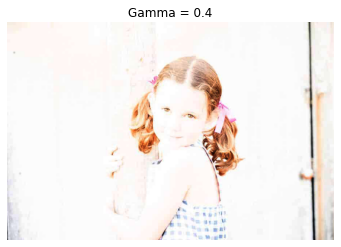

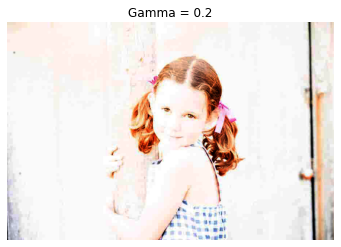

In [128]:
for gamma in np.arange(1.0, 0.1, -0.2):
	gamma = gamma if gamma > 0 else 0.1
	adjusted = adjust_gamma(img2_rgb, gamma=gamma)
	plt.imshow(adjusted)
	plt.title("Gamma = %.1f" % gamma)
	plt.axis("off")
	plt.show()